# Rapid-Fire EDA process using Python

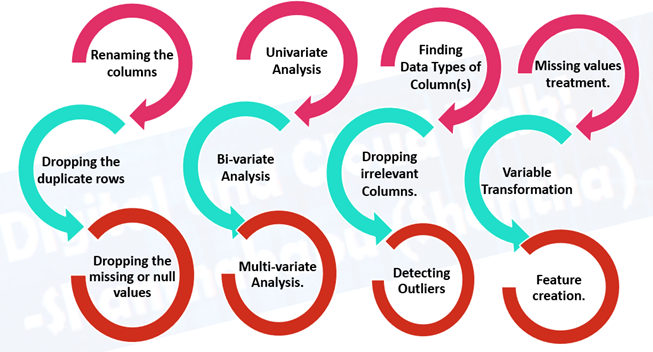

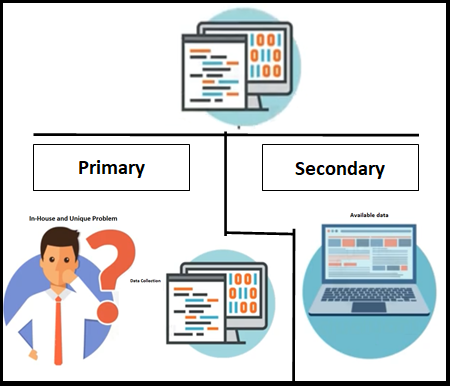

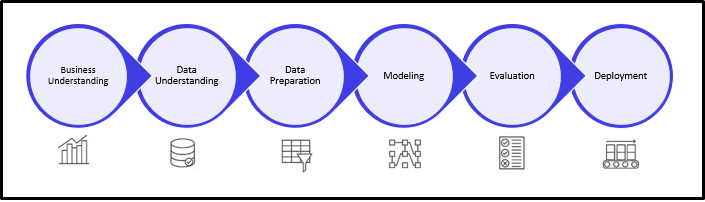

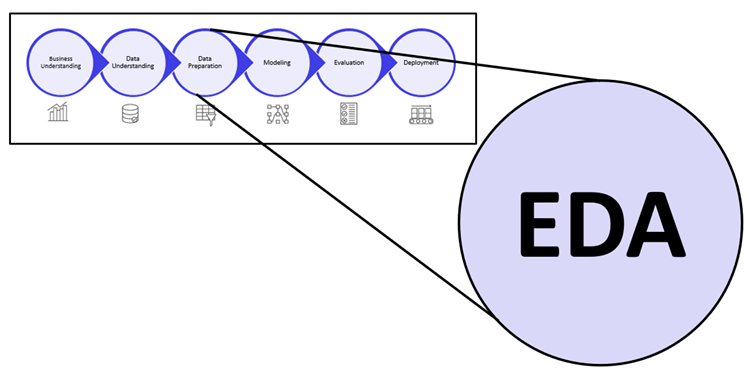

### Exploratory Data Analysis(EDA)
What is EDA? Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. 

### Out Come of this phase as below

1. Understanding the given dataset and helps clean up the given dataset.
2. It gives you a clear picture of the features and the relationships between them.
3. Providing guidelines for essential variables and leaving behind/removing non-essential variables.
4. Handling Missing values or human error.
5. Identifying outliers.
6. EDA process would be maximizing insights of a dataset.

### This process is time-consuming but very effective, the below activities are involved during this phase, it would be varied and depends on the available data and acceptance from the customer.

In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

######################################
       Import Key Packages            
######################################


In [2]:
df_cars = pd.read_csv("auto-mpg.csv")
df_cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Data Cleaning/Wrangling:
the process of cleaning and unifying messy and complex data sets for easy access and analysis.

Action:

replace(‘?’,’NaN’)
Converting “horsepower” Object type into int

In [4]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower.astype(int)
print("######################################################################")
print("          After Cleaning and type covertion in the Data Set")
print("######################################################################")
df_cars.info()

######################################################################
          After Cleaning and type covertion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


Group by names

Correcting the brand name (Since misspelled, we have to correct it)

In [7]:
df_cars = df_cars.rename(columns = {"car name":"name"})
df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda')
df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
df_cars['name'] = df_cars['name'].str.replace('vokswagen|volkswagen|vw','volkswagen')
df_cars.groupby(['name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


In [8]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


### Dealing with missing value

In [9]:
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)

###  Skewness and Kutosis

In [10]:
print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


### Categorical Variable move

In [11]:
df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


### Create dummy variables

In [12]:
cData = pd.get_dummies(df_cars, columns=['origin'])
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,volkswagen pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [13]:
df_cars = df_cars.drop('name',axis=1)

### Univariate analysis

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


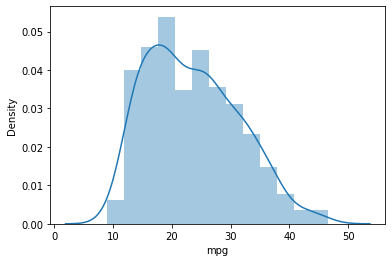

In [14]:
sns_plot = sns.distplot(df_cars["mpg"])

### Bivariate analysis

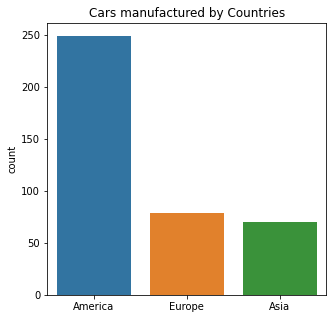

In [15]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

### Exploring range of distribution of numerical variable

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

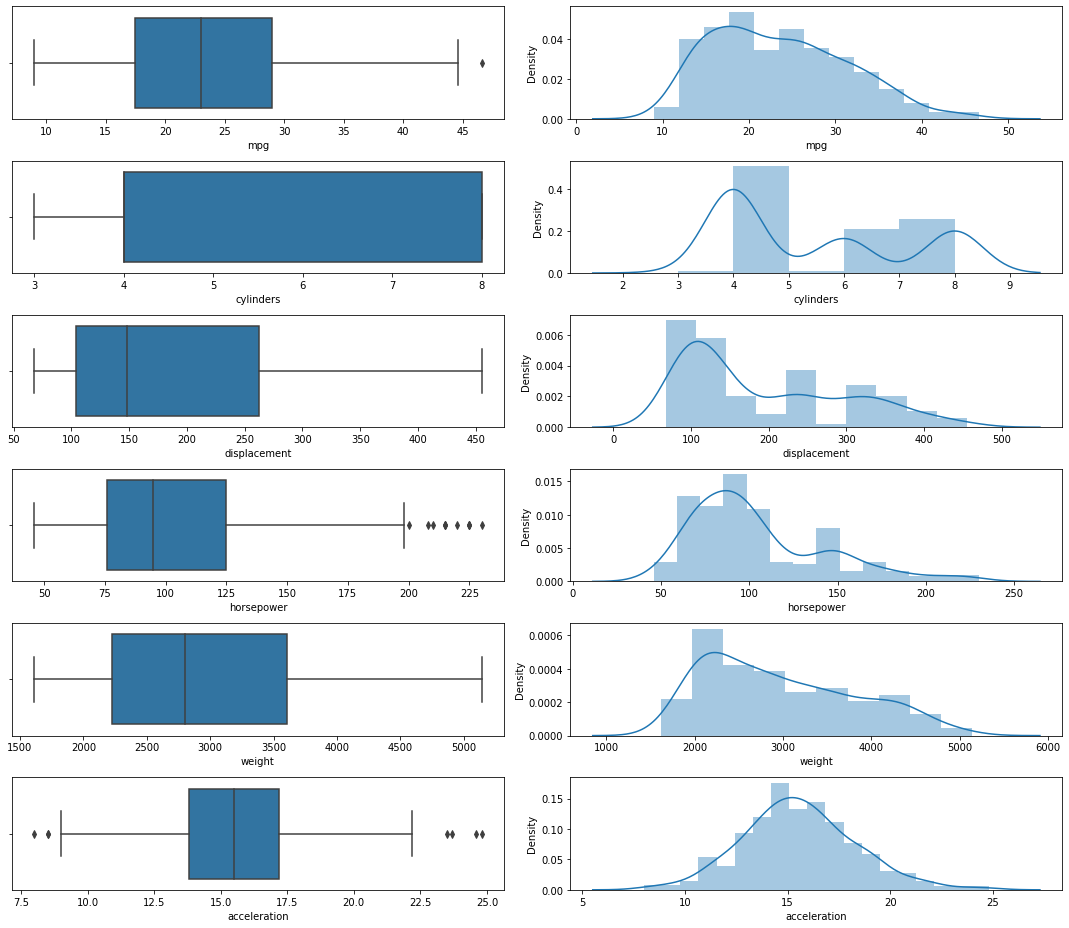

In [16]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.distplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
sns.distplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
sns.distplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
sns.distplot(df_cars['horsepower'], ax = ax[3,1])
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
sns.distplot(df_cars['weight'], ax = ax[4,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
sns.distplot(df_cars['acceleration'], ax = ax[5,1])
plt.tight_layout()

### Plot numerical varibale

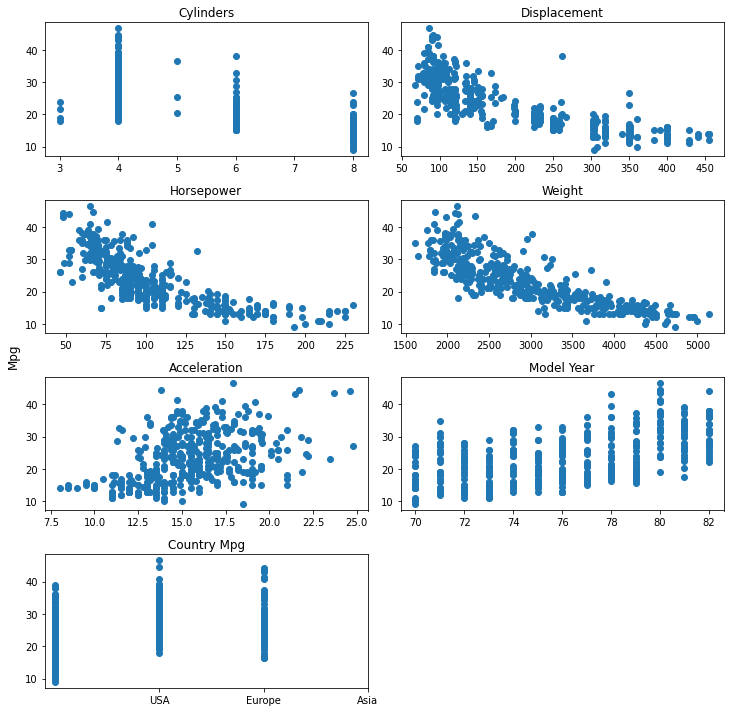

In [20]:
df_cars = df_cars.rename(columns = {"model year":"model_year"})
f,axarr = plt.subplots(4,2, figsize=(10,10))
mpgval = df_cars.mpg.values
axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model_year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

### Multi-Variate Analysis

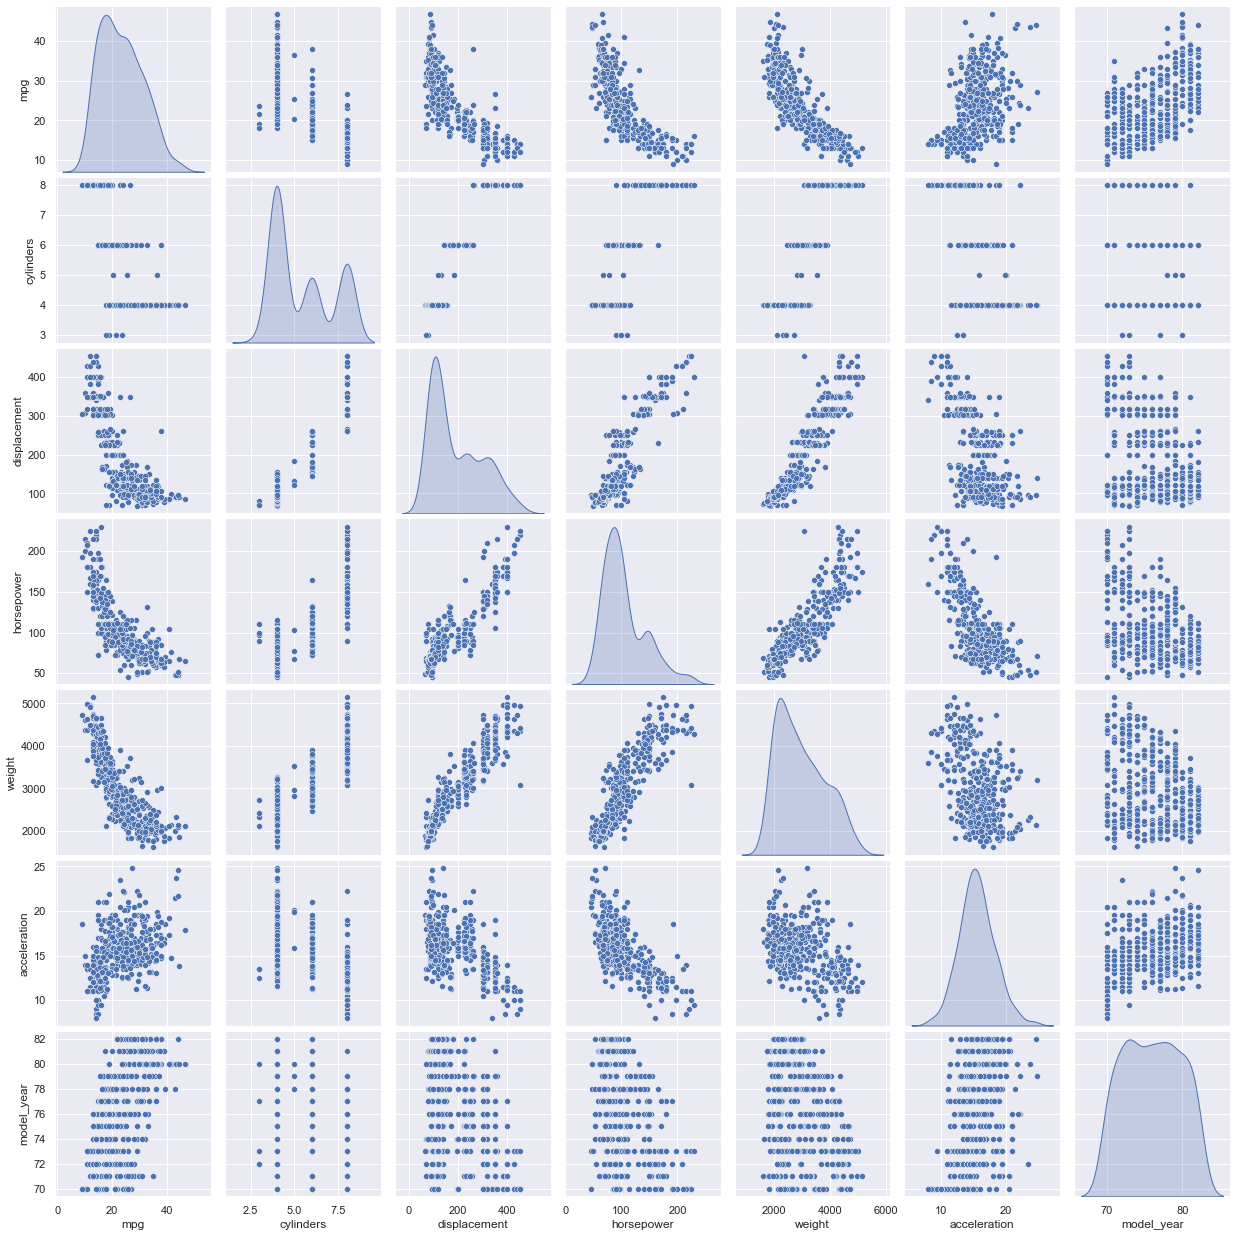

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_cars.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

### Distribution of variable

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


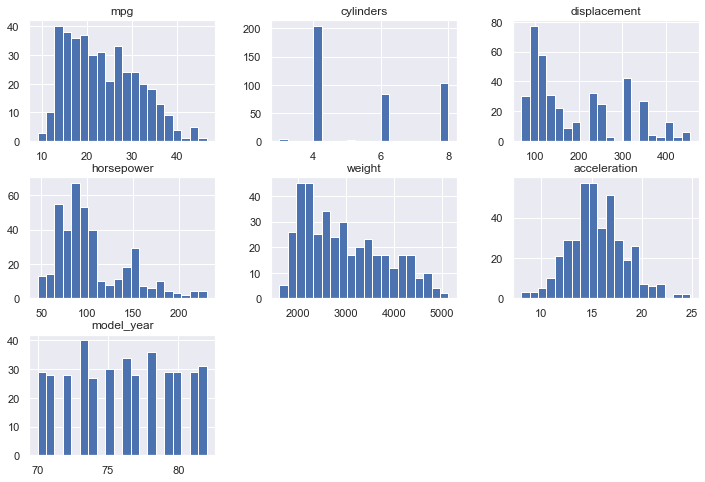

In [22]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()

### Corelation

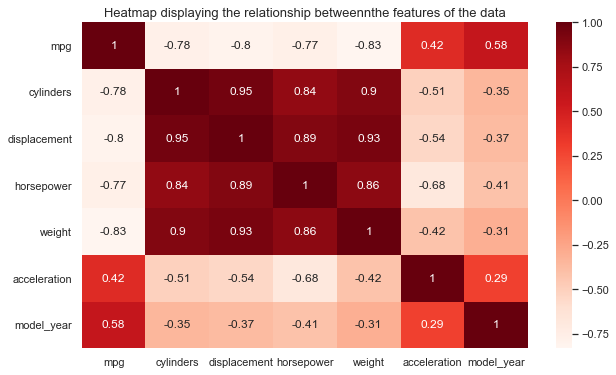

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()